In [1]:
import torch
print(torch.__version__)

2.0.0+cu118


In [2]:
# GPU 연결

In [2]:
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [5]:
!git clone https://github.com/ultralytics/ultralytics.git

fatal: destination path 'ultralytics' already exists and is not an empty directory.


In [7]:
%cd ./ultralytics/ultralytics
#%pip install -qr requirements.txt

[WinError 2] 지정된 파일을 찾을 수 없습니다: './ultralytics/ultralytics'
C:\Users\HSLab\Documents\kbChoi\yn\ultralytics


In [3]:
%pwd

'C:\\Users\\HSLab\\Documents\\kbChoi\\yn'

In [2]:
!git clone https://github.com/Ottug-i/Curry_Object_Detection

Cloning into 'Curry_Object_Detection'...
Updating files:   2% (1352/45143)
Updating files:   3% (1355/45143)
Updating files:   4% (1806/45143)
Updating files:   5% (2258/45143)
Updating files:   6% (2709/45143)
Updating files:   6% (2832/45143)
Updating files:   7% (3161/45143)
Updating files:   8% (3612/45143)
Updating files:   9% (4063/45143)
Updating files:   9% (4304/45143)
Updating files:  10% (4515/45143)
Updating files:  11% (4966/45143)
Updating files:  12% (5418/45143)
Updating files:  12% (5859/45143)
Updating files:  13% (5869/45143)
Updating files:  14% (6321/45143)
Updating files:  15% (6772/45143)
Updating files:  16% (7223/45143)
Updating files:  16% (7391/45143)
Updating files:  17% (7675/45143)
Updating files:  18% (8126/45143)
Updating files:  19% (8578/45143)
Updating files:  19% (8639/45143)
Updating files:  20% (9029/45143)
Updating files:  21% (9481/45143)
Updating files:  22% (9932/45143)
Updating files:  22% (10117/45143)
Updating files:  23% (10383/45143)
Updat

In [12]:
%cd ./yolov5

C:\Users\HSLab\Documents\kbChoi\yn\yolov5


In [4]:
# Data Augmentation

In [13]:
import albumentations as A
import cv2
import numpy as np
from PIL import Image
import torch
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [6]:
# 파일 이름 정보 가져오기
image_dir = "../Curry_Object_Detection/object_detection/dataset/images"

file_names = [filename.split(".jpg")[0] for filename in os.listdir(image_dir) if filename.endswith(".jpg")]

FileNotFoundError: [WinError 3] 지정된 경로를 찾을 수 없습니다: '../Curry_Object_Detection/object_detection/dataset/images'

In [14]:
# 이미지와 바운딩 박스 정보 가져오기
def get_image_and_bboxes(image_path, label_path, name):

    image = cv2.imread(image_path + name + '.jpg')
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    bboxes = np.loadtxt(label_path + name + '.txt', delimiter=" ", ndmin=2)
    bboxes = np.roll(bboxes, 4, axis=1).tolist()

    return image, bboxes

In [15]:
# 그리기
def myFig(img, labels):
    fig, ax = plt.subplots()
    ax.imshow(img)

    dw = img.shape[1]
    dh = img.shape[0]

    for label in labels:
        x1 = (label[0] - label[2] / 2) * dw
        y1 = (label[1] - label[3] / 2) * dh
        w = label[2] * dw
        h = label[3] * dh
        rect = patches.Rectangle((x1, y1), w, h, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

    plt.show()

In [16]:
# 이미지 저장
def save_transformed_info(image_dir, label_dir, transformed_images_dir, transformed_labels_dir, file_name, transformed_image, transformed_bboxes):

    image_path = os.path.join(transformed_images_dir, file_name + '.jpg')
    cv2.imwrite(image_path, cv2.cvtColor(transformed_image, cv2.COLOR_RGB2BGR))

    label_path = os.path.join(transformed_labels_dir, file_name + '.txt')
    with open(label_path, 'w') as f:
        for bbox in transformed_bboxes:
            f.write(' '.join(map(str, bbox)) + '\n')

In [ ]:
# 예시 (1개만 실행)

image_dir = "../Curry_Object_Detection/object_detection/dataset/images/"
label_dir = "../Curry_Object_Detection/object_detection/dataset/labels/"
transformed_images_dir = "../Curry_Object_Detection/object_detection/"
transformed_labels_dir = "../Curry_Object_Detection/object_detection/"

file_name = file_names[5]
try:
  # 이미지, 바운딩 박스 정보 불러오기
  image, bboxes = get_image_and_bboxes(image_dir, label_dir, file_name)

  # 변경 전
  print("변경 전 바운딩 박스 : " + str(bboxes))
  myFig(image, bboxes)

  # 변환
  train_transforms = A.Compose(
    [
        A.RandomBrightnessContrast(brightness_limit=0.5),
        A.GaussNoise(var_limit=50.0),
        A.Rotate(limit=50),
        A.Cutout(num_holes=5, max_h_size=120, max_w_size=120),
        A.Blur(blur_limit=5)
    ],
    bbox_params=A.BboxParams(format='yolo', min_visibility=0.4, label_fields=[])
    )
  transformed = train_transforms(image=image, bboxes=bboxes)
  transformed_image = transformed['image']
  transformed_bboxes = transformed['bboxes']

  # 변경 후
  print("변경 후 바운딩 박스 : " + str(transformed_bboxes))
  myFig(transformed_image, transformed_bboxes)

  # 변경된 이미지 저장
  # 새로운 train_tranforms을 할 시에는 file_name 뒤의 " " 부분 수정해야 새로운 파일 이름으로 저장됨
  bboxes_restored = np.roll(transformed_bboxes, -4, axis=1).tolist()
  bboxes_restored = [[int(box[0])] + box[1:] for box in bboxes_restored] # 클래스 소수점 .0 삭제
  save_transformed_info(image_dir, label_dir, transformed_images_dir, transformed_labels_dir, file_name + "te", transformed_image, bboxes_restored)

except Exception as e:
  print(f"다음 파일은 넘어갑니다. file_name : {file_name}")
  print(f"오류 메세지: {e}")

In [ ]:
# 실제 (모두 실행)

image_dir = "../Curry_Object_Detection/object_detection/dataset/images/"
label_dir = "../Curry_Object_Detection/object_detection/dataset/labels/"
transformed_images_dir = "../Curry_Object_Detection/object_detection/dataset/images/"
transformed_labels_dir = "../Curry_Object_Detection/object_detection/dataset/labels/"

for file_name in file_names:
  try:
    # 이미지, 바운딩 박스 정보 불러오기
    image, bboxes = get_image_and_bboxes(image_dir, label_dir, file_name)

    # 변경 전
    print("변경 전 바운딩 박스 : " + str(bboxes))
    myFig(image, bboxes)

    # 변환
    train_transforms = A.Compose(
      [
         A.RandomBrightnessContrast(brightness_limit=0.5),
        A.GaussNoise(var_limit=50.0),
        A.Rotate(limit=50),
        A.Cutout(num_holes=5, max_h_size=120, max_w_size=120),
        A.Blur(blur_limit=5)
      ],
      bbox_params=A.BboxParams(format='yolo', min_visibility=0.4, label_fields=[])
      )
    transformed = train_transforms(image=image, bboxes=bboxes)
    transformed_image = transformed['image']
    transformed_bboxes = transformed['bboxes']

    # 변경 후
    print("변경 후 바운딩 박스 : " + str(transformed_bboxes))
    myFig(transformed_image, transformed_bboxes)

    # 변경된 이미지 저장
    # 새로운 train_tranforms을 할 시에는 file_name 뒤의 " " 부분 수정해야 새로운 파일 이름으로 저장됨
    bboxes_restored = np.roll(transformed_bboxes, -4, axis=1).tolist()
    bboxes_restored = [[int(box[0])] + box[1:] for box in bboxes_restored] # 클래스 소수점 .0 삭제
    save_transformed_info(image_dir, label_dir, transformed_images_dir, transformed_labels_dir, file_name + "t1", transformed_image, bboxes_restored)

  except Exception as e:
    print(f"다음 파일은 넘어갑니다. file_name : {file_name}")

In [18]:
%cd ../

C:\Users\HSLab\Documents\kbChoi\yn


In [ ]:
# 실제 (옥수수 데이터 추가 실행)


image_dir = "./train/images"

file_names = [filename.split(".jpg")[0] for filename in os.listdir(image_dir) if filename.endswith(".jpg")]

image_dir = "./train/images/"
label_dir = "./train/labels/"
transformed_images_dir = "./train/images/"
transformed_labels_dir = "./train/labels/"

for file_name in file_names:
  try:
    # 이미지, 바운딩 박스 정보 불러오기
    image, bboxes = get_image_and_bboxes(image_dir, label_dir, file_name)

    # 변경 전
    print("변경 전 바운딩 박스 : " + str(bboxes))
    myFig(image, bboxes)

    # 변환
    train_transforms = A.Compose(
      [
         A.RandomBrightnessContrast(brightness_limit=0.5),
        A.GaussNoise(var_limit=50.0),
        A.Rotate(limit=50),
        A.Cutout(num_holes=5, max_h_size=120, max_w_size=120),
        A.Blur(blur_limit=5)
      ],
      bbox_params=A.BboxParams(format='yolo', min_visibility=0.4, label_fields=[])
      )
    transformed = train_transforms(image=image, bboxes=bboxes)
    transformed_image = transformed['image']
    transformed_bboxes = transformed['bboxes']

    # 변경 후
    print("변경 후 바운딩 박스 : " + str(transformed_bboxes))
    myFig(transformed_image, transformed_bboxes)

    # 변경된 이미지 저장
    # 새로운 train_tranforms을 할 시에는 file_name 뒤의 " " 부분 수정해야 새로운 파일 이름으로 저장됨
    bboxes_restored = np.roll(transformed_bboxes, -4, axis=1).tolist()
    bboxes_restored = [[int(box[0])] + box[1:] for box in bboxes_restored] # 클래스 소수점 .0 삭제
    save_transformed_info(image_dir, label_dir, transformed_images_dir, transformed_labels_dir, file_name + "t1", transformed_image, bboxes_restored)

  except Exception as e:
    print(f"다음 파일은 넘어갑니다. file_name : {file_name}")

In [4]:
%cd ./yolov5

C:\Users\HSLab\Documents\kbChoi\yn\yolov5


In [5]:
## Dataset Split

In [6]:
from glob import glob

data_img_list = glob('../Curry_Object_Detection/object_detection/dataset/images/*.jpg')
print(len(data_img_list))

42891


In [7]:
from sklearn.model_selection import train_test_split

train_img_list, test_img_list = train_test_split(data_img_list, test_size=0.2, random_state=777)
print(len(train_img_list), len(test_img_list))

34312 8579


In [8]:
test_img_list, valid_img_list = train_test_split(test_img_list, test_size=0.5, random_state=777)
print(len(test_img_list), len(valid_img_list))

4289 4290


In [9]:
## Edit Data.yaml

In [10]:
#yaml 파일에 이미지 경로 리스트 작성
import yaml

with open('../Curry_Object_Detection/object_detection/train.txt', 'w') as f:
    f.write('\n'.join(train_img_list) + '\n')

with open('../Curry_Object_Detection/object_detection/test.txt', 'w') as f:
    f.write('\n'.join(test_img_list) + '\n')

with open('../Curry_Object_Detection/object_detection/valid.txt', 'w') as f:
    f.write('\n'.join(valid_img_list) + '\n')

In [11]:
# 파일의 문장을 텍스트처럼 이용하기 위해 함수 생성
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

In [12]:
%%writetemplate ../Curry_Object_Detection/object_detection/data.yaml

train: ../Curry_Object_Detection/object_detection/train.txt
test: ../Curry_Object_Detection/object_detection/test.txt
val: ../Curry_Object_Detection/object_detection/valid.txt

nc: 111
names: ['참치캔', '라면', '카레', '소주', '맥주', '닭', '닭가슴살', '소고기', '돼지', '오리고기', '삼겹살', '사과', '바나나', '레몬', '오렌지', '크랜베리', '복숭아', '포도', '망고', '토마토', '딸기', '체리', '수박', '석류', '고추', '파프리카', '당근', '옥수수', '오이', '가지', '마늘', '상추', '양파', '감자', '무', '시금치', '고구마', '샐러리', '브로콜리', '애호박', '단호박', '대파', '김치', '연근', '파슬리', '콩나물', '아보카도', '새송이버섯', '느타리버섯', '배추', '팽이버섯', '표고버섯', '양송이버섯', '목이버섯', '청경채', '고사리', '굴', '연어', '문어', '가리비', '해삼', '새우', '홍합', '갈치', '다시마', '꼬막', '고등어', '게', '전복', '참치', '오징어', '맛살', '초고추장', '땅콩잼', '누텔라', '케찹', '식용유', '식초', '후추', '달걀', '삶은달걀', '스팸', '소시지', '버터', '치즈', '우유', '만두', '두부', '밥', '파스타면', '국수', '밤', '아몬드', '호두', '식빵', '바게트', '크로와상', '와플', '고추장', '빵', '마요네즈', '김', '멸치', '생강', '베이컨', '박력분', '양배추', '깻잎', '머스터드', '된장', '부추']

In [26]:
%cat ../../Curry_Data/object_detection/data.yaml # train, valid 경로 정보 및 레이블 (클래스) 확인

UsageError: Line magic function `%cat` not found.


In [27]:
## Edit Model Structure 

In [10]:
%pwd

'C:\\Users\\HSLab\\Documents\\kbChoi\\yn\\yolov5'

In [10]:
import yaml

# 데이터에서 클래스 수 가져오기
with open('../Curry_Object_Detection/object_detection/data.yaml', 'r', encoding='cp949') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

print(num_classes)


111


In [12]:
# 80개의 클래스
%cat ./models/yolov8.yaml

UsageError: Line magic function `%cat` not found.


In [ ]:
%%writetemplate ./models/custom_yolov5m.yaml

# YOLOv5 🚀 by Ultralytics, AGPL-3.0 license

# Parameters
nc: {num_classes}  # number of classes
depth_multiple: 0.67  # model depth multiple
width_multiple: 0.75  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, C3, [256, False]],  # 17 (P3/8-small)

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, C3, [512, False]],  # 20 (P4/16-medium)

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, C3, [1024, False]],  # 23 (P5/32-large)

   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
  ]


In [16]:
%pwd

'C:\\Users\\HSLab\\Documents\\kbChoi\\yn\\yolov5'

In [3]:
%cd ./yolov5

C:\Users\HSLab\Documents\kbChoi\yn\yolov5


In [25]:
## Train

In [56]:
!python train.py --img 640 --batch 16 --epochs 100 --data ../Curry_Object_Detection/object_detection/data.yaml --cfg ./models/custom_yolov5m.yaml --weight yolov5m.pt --name results_ver4 --cache --device 0

WARNING  'ultralytics.yolo.v8' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.models.yolo' instead.
WARNING  'ultralytics.yolo.utils' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.utils' instead.
Note this warning may be related to loading older models. You can update your model to current structure with:
    import torch
    ckpt = torch.load("model.pt")  # applies to both official and custom models
    torch.save(ckpt, "updated-model.pt")

train: weights=yolov5s.pt, cfg=./models/custom_yolov5s.yaml, data=../Curry_Data/object_detection/data.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=150, batch_size=64, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=0, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=0, project=runs\train, name=ingredients_results, exist_ok=False, q

In [4]:
!python val.py --weights runs/train/results_final2/weights/best.pt --data ../Curry_Object_Detection/object_detection/data.yaml --img 640 --iou 0.65 --half

val: data=../Curry_Object_Detection/object_detection/data.yaml, weights=['runs/train/results_final2/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.65, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs\val, name=exp, exist_ok=False, half=True, dnn=False
YOLOv5  v7.0-207-gdf48c20 Python-3.11.4 torch-2.0.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3080 Ti, 12288MiB)

Fusing layers... 
custom_YOLOv5m summary: 212 layers, 21297444 parameters, 0 gradients, 49.3 GFLOPs

val: Scanning C:\Users\HSLab\Documents\kbChoi\yn\Curry_Object_Detection\object_detection\valid...:   0%|          | 0/4290 [00:00<?, ?it/s]Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "C:\Users\HSLab\anaconda3\envs\curry\Lib\multiprocessing\spawn.py", line 120, in spawn_main
    exitcode = _main(fd, parent_sentinel)
               ^^^^^^^^^^^^^^^^^^^^^

In [5]:
!python val.py --weights runs/train/results_final2/weights/best.pt --data ../Curry_Object_Detection/object_detection/data.yaml --img 640 --task test

val: data=../Curry_Object_Detection/object_detection/data.yaml, weights=['runs/train/results_final2/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs\val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5  v7.0-207-gdf48c20 Python-3.11.4 torch-2.0.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3080 Ti, 12288MiB)

Fusing layers... 
custom_YOLOv5m summary: 212 layers, 21297444 parameters, 0 gradients, 49.3 GFLOPs

test: Scanning C:\Users\HSLab\Documents\kbChoi\yn\Curry_Object_Detection\object_detection\test...:   0%|          | 0/4289 [00:00<?, ?it/s]
test: Scanning C:\Users\HSLab\Documents\kbChoi\yn\Curry_Object_Detection\object_detection\test... 1 images, 0 backgrounds, 0 corrupt:   0%|          | 1/4289 [00:06<7:15:18,  6.09s/it]
test: Scanning C:\Users\HSLab\Documents\kbChoi\yn\Curry_Object_D

In [6]:
!python detect.py --weights runs/train/results_final2/weights/best.pt --img 640 --conf 0.4 --source ../Curry_Object_Detection/object_detection/test

detect: weights=['runs/train/results_final2/weights/best.pt'], source=../Curry_Object_Detection/object_detection/test, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5  v7.0-207-gdf48c20 Python-3.11.4 torch-2.0.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3080 Ti, 12288MiB)

Fusing layers... 
custom_YOLOv5m summary: 212 layers, 21297444 parameters, 0 gradients, 49.3 GFLOPs
image 1/6 C:\Users\HSLab\Documents\kbChoi\yn\Curry_Object_Detection\object_detection\test\2020071602103_0.jpg: 544x640 1 , 91.8ms
image 2/6 C:\Users\HSLab\Documents\kbChoi\yn\Curry_Object_Detection\object_detection\test\20220213191115.jpg: 384x640 1 , 91.3ms
image 3/6 C:\Users\HSLa

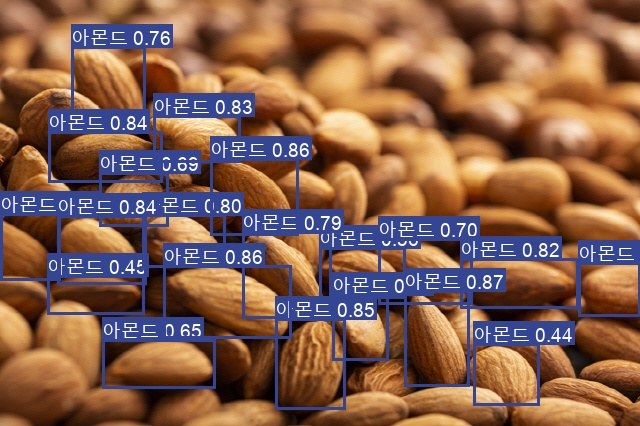

In [13]:
import glob
import random
from IPython.display import Image, display

image_name = random.choice(glob.glob('./runs/detect/exp6/*.jpg'))
display(Image(filename=image_name))

In [22]:
%pwd

'C:\\Users\\HSLab\\Documents\\kbChoi\\yn\\yolov5'

In [16]:
!python export.py --weights ./runs/train/new_results/weights/best.pt --include tflite --imgsz 2560

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(1, 2560, 2560, 3)]         0         []                            
                                                                                                  
 tf_conv (TFConv)            (1, 1280, 1280, 48)          5232      ['input_1[0][0]']             
                                                                                                  
 tf_conv_1 (TFConv)          (1, 640, 640, 96)            41568     ['tf_conv[0][0]']             
                                                                                                  
 tfc3 (TFC3)                 (1, 640, 640, 96)            64896     ['tf_conv_1[0][0]']           
                                                                                              

export: data=C:\Users\HSLab\Documents\kbChoi\yn\yolov5\data\coco128.yaml, weights=['./runs/train/new_results/weights/best.pt'], imgsz=[2560], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['tflite']
YOLOv5  v7.0-207-gdf48c20 Python-3.11.4 torch-2.0.0+cu118 CPU

Fusing layers... 
custom_YOLOv5m summary: 212 layers, 21297444 parameters, 0 gradients, 49.3 GFLOPs

PyTorch: starting from runs\train\new_results\weights\best.pt with output shape (1, 403200, 116) (41.0 MB)

TensorFlow SavedModel: starting export with tensorflow 2.13.0...

                 from  n    params  module                                  arguments                     
  0                -1  1      5280  models.common.Conv                      [3, 48, 6, 2, 2]              
  1                -1  1  

In [2]:
cd ./yolov5

C:\Users\HSLab\Documents\kbChoi\yn\yolov5


In [3]:
!python export.py --weights ./runs/train/results_ver7/weights/best.pt --include tflite --imgsz 1440

^C


In [4]:
!python export.py --weights ./runs/train/results_final2/weights/best.pt --include tflite --imgsz 1440

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(1, 1440, 1440, 3)]         0         []                            
                                                                                                  
 tf_conv (TFConv)            (1, 720, 720, 48)            5232      ['input_1[0][0]']             
                                                                                                  
 tf_conv_1 (TFConv)          (1, 360, 360, 96)            41568     ['tf_conv[0][0]']             
                                                                                                  
 tfc3 (TFC3)                 (1, 360, 360, 96)            64896     ['tf_conv_1[0][0]']           
                                                                                              

export: data=C:\Users\HSLab\Documents\kbChoi\yn\yolov5\data\coco128.yaml, weights=['./runs/train/results_ver7/weights/best.pt'], imgsz=[1440], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['tflite']
fatal: detected dubious ownership in repository at 'C:/Users/HSLab/Documents/kbChoi/yn/yolov5'
'C:/Users/HSLab/Documents/kbChoi/yn/yolov5' is owned by:
	'S-1-5-32-544'
but the current user is:
	'S-1-5-21-3225398082-4099812732-663890212-1001'
To add an exception for this directory, call:

	git config --global --add safe.directory C:/Users/HSLab/Documents/kbChoi/yn/yolov5
YOLOv5  2023-8-10 Python-3.11.4 torch-2.0.0+cu118 CPU

Fusing layers... 
custom_YOLOv5m summary: 212 layers, 21297444 parameters, 0 gradients, 49.3 GFLOPs

PyTorch: starting from runs\train\results_ver7\w

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(1, 1440, 1440, 3)]         0         []                            
                                                                                                  
 tf_conv (TFConv)            (1, 720, 720, 48)            5232      ['input_1[0][0]']             
                                                                                                  
 tf_conv_1 (TFConv)          (1, 360, 360, 96)            41568     ['tf_conv[0][0]']             
                                                                                                  
 tfc3 (TFC3)                 (1, 360, 360, 96)            64896     ['tf_conv_1[0][0]']           
                                                                                              

export: data=C:\Users\HSLab\Documents\kbChoi\yn\yolov5\data\coco128.yaml, weights=['./runs/train/results_final2/weights/best.pt'], imgsz=[1440], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['tflite']
fatal: detected dubious ownership in repository at 'C:/Users/HSLab/Documents/kbChoi/yn/yolov5'
'C:/Users/HSLab/Documents/kbChoi/yn/yolov5' is owned by:
	'S-1-5-32-544'
but the current user is:
	'S-1-5-21-3225398082-4099812732-663890212-1001'
To add an exception for this directory, call:

	git config --global --add safe.directory C:/Users/HSLab/Documents/kbChoi/yn/yolov5
YOLOv5  2023-8-10 Python-3.11.4 torch-2.0.0+cu118 CPU

Fusing layers... 
custom_YOLOv5m summary: 212 layers, 21297444 parameters, 0 gradients, 49.3 GFLOPs

PyTorch: starting from runs\train\results_fina

In [2]:
%cd yolov5

C:\Users\HSLab\Documents\kbChoi\yn\yolov5


In [3]:
!python export.py --weights ./runs/train/results_ver7/weights/best.pt --include torchscript --imgsz 640 --optimize

export: data=C:\Users\HSLab\Documents\kbChoi\yn\yolov5\data\coco128.yaml, weights=['./runs/train/results_ver7/weights/best.pt'], imgsz=[640], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=True, int8=False, dynamic=False, simplify=False, opset=17, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['torchscript']
YOLOv5  v7.0-207-gdf48c20 Python-3.11.4 torch-2.0.0+cu118 CPU

Fusing layers... 
custom_YOLOv5m summary: 212 layers, 21297444 parameters, 0 gradients, 49.3 GFLOPs

PyTorch: starting from runs\train\results_ver7\weights\best.pt with output shape (1, 25200, 116) (41.0 MB)

TorchScript: starting export with torch 2.0.0+cu118...
TorchScript: export success  4.5s, saved as runs\train\results_ver7\weights\best.torchscript (81.5 MB)

Export complete (5.7s)
Results saved to C:\Users\HSLab\Documents\kbChoi\yn\yolov5\runs\train\results_ver7\weights
Detect:          python detec